## Problem Definition :

User should be able to provide a Customer ID and Date, and program should be able to 
predict quantity

In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv("online_retail.csv")

In [3]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [5]:
data.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [6]:
# removing rows where description is null , customerid is null , unit price is less than 1 and quantity is in negative.
# all condition needs to be true
to_drop = data[(data['Description'].isnull()) & (data['CustomerID'].isnull()) & 
               (data['UnitPrice'] < 1) & (data['Quantity'] < 0)].index

# Remove the filtered rows
data.drop(to_drop, inplace=True)

In [7]:
data.isna().sum()

InvoiceNo           0
StockCode           0
Description       592
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     134218
Country             0
dtype: int64

In [8]:
# forward filled all null CustomerID because

data['CustomerID'].fillna(method='ffill', inplace=True)

In [9]:
data.isna().sum()

InvoiceNo        0
StockCode        0
Description    592
Quantity         0
InvoiceDate      0
UnitPrice        0
CustomerID       0
Country          0
dtype: int64

In [10]:
# removing rows where quantity is in negative
# removing rows where quantity is greater than 2000 to remove outliers

data = data[(data['Quantity'] >= 0) & (data['Quantity'] <= 2000)]

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 531259 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    531259 non-null  object 
 1   StockCode    531259 non-null  object 
 2   Description  530669 non-null  object 
 3   Quantity     531259 non-null  int64  
 4   InvoiceDate  531259 non-null  object 
 5   UnitPrice    531259 non-null  float64
 6   CustomerID   531259 non-null  float64
 7   Country      531259 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 36.5+ MB


In [12]:
neg_rows = data[data['Quantity'] <= 0]
neg_rows

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country


In [13]:
print(data.duplicated().sum())
data.drop_duplicates(inplace=True)

5231


In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 526028 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    526028 non-null  object 
 1   StockCode    526028 non-null  object 
 2   Description  525438 non-null  object 
 3   Quantity     526028 non-null  int64  
 4   InvoiceDate  526028 non-null  object 
 5   UnitPrice    526028 non-null  float64
 6   CustomerID   526028 non-null  float64
 7   Country      526028 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 36.1+ MB


In [15]:
# converted InvoiceDate to date time format and extracted Day, Month and Year.

data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])
data['Day'] = data['InvoiceDate'].dt.day
data['Month'] = data['InvoiceDate'].dt.month
data['Year'] = data['InvoiceDate'].dt.year

In [16]:
# these columns are not required for prediction hence we are removing these columns.

data.drop(columns=['InvoiceNo','StockCode','Description','UnitPrice','Country','InvoiceDate'], axis=1, inplace=True)

In [17]:
data.head(1)

,Quantity,CustomerID,Day,Month,Year
0,6,17850.0,1,12,2010


In [18]:
data['CustomerID'] = data['CustomerID'].astype('int64')
data['Quantity'] = data['Quantity'].astype('int64')

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 526028 entries, 0 to 541908
Data columns (total 5 columns):
 #   Column      Non-Null Count   Dtype
---  ------      --------------   -----
 0   Quantity    526028 non-null  int64
 1   CustomerID  526028 non-null  int64
 2   Day         526028 non-null  int64
 3   Month       526028 non-null  int64
 4   Year        526028 non-null  int64
dtypes: int64(5)
memory usage: 24.1 MB


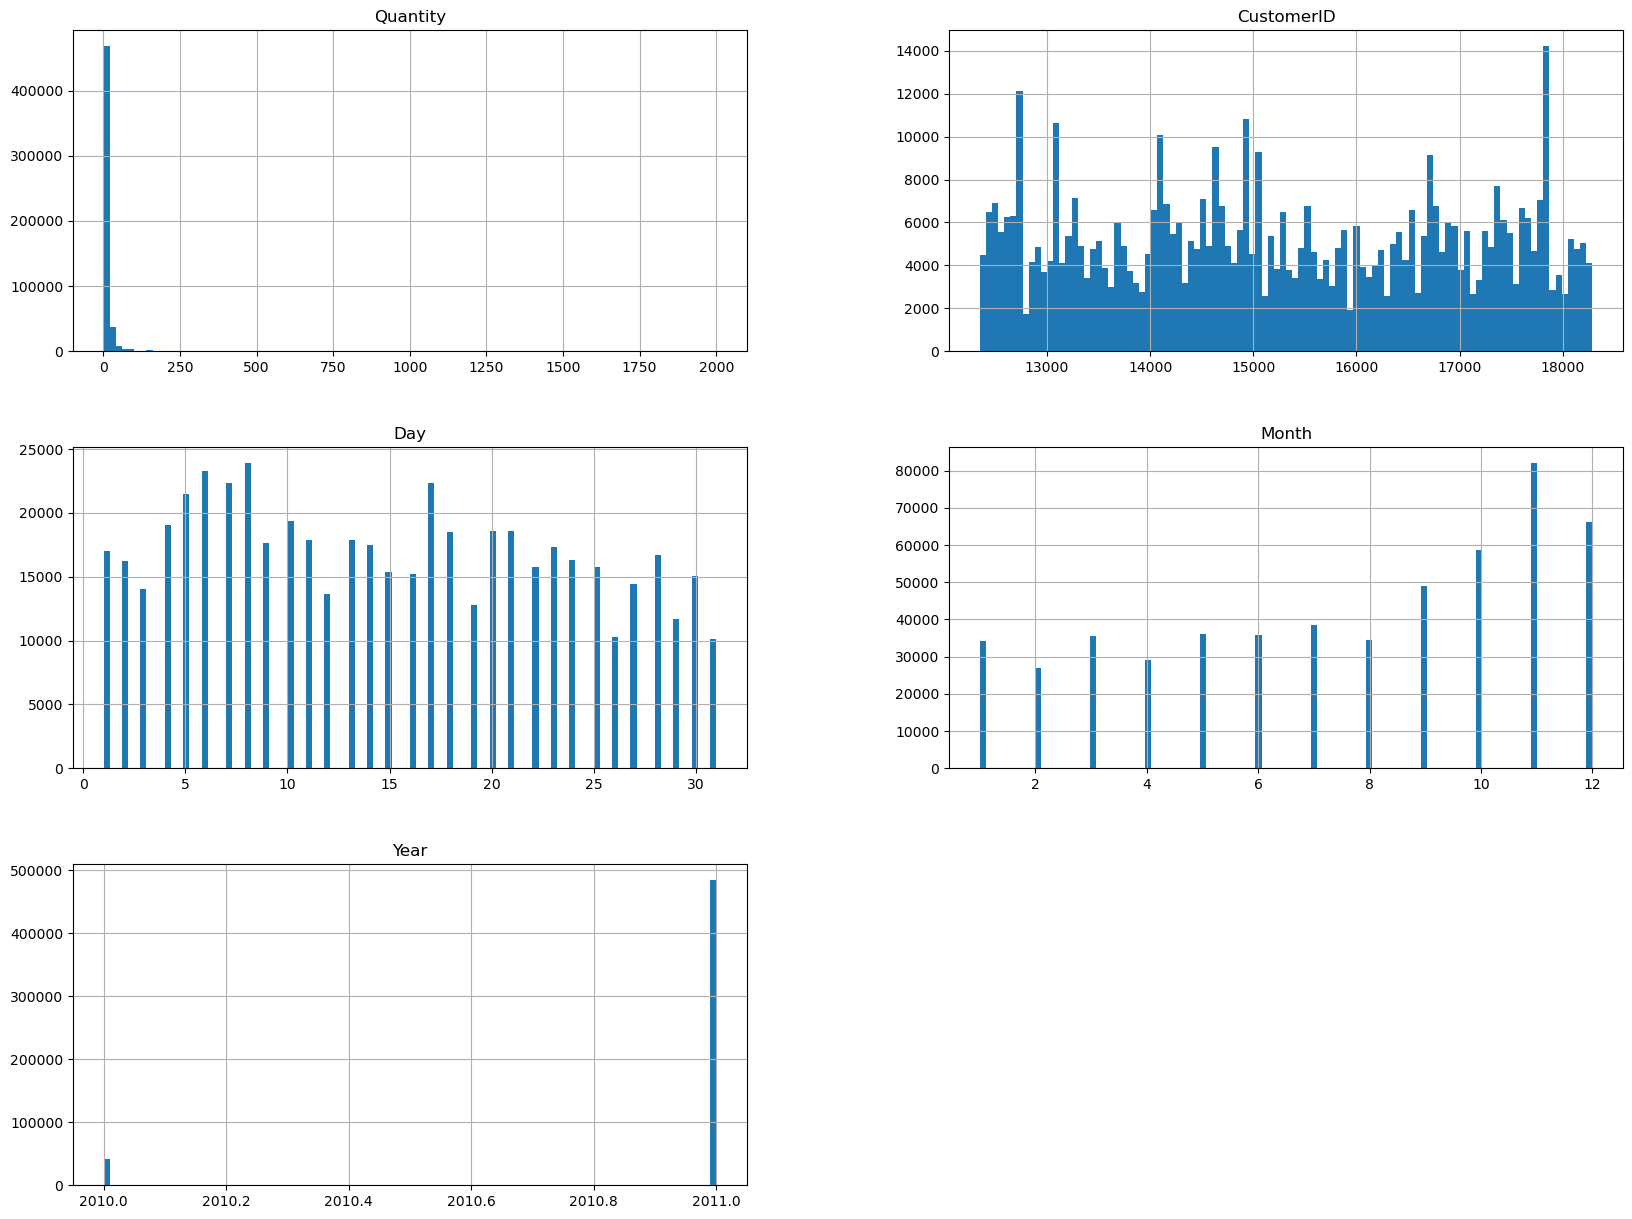

In [20]:
import matplotlib.pyplot as plt
data.hist(bins=100, figsize=(20,15))
plt.show()

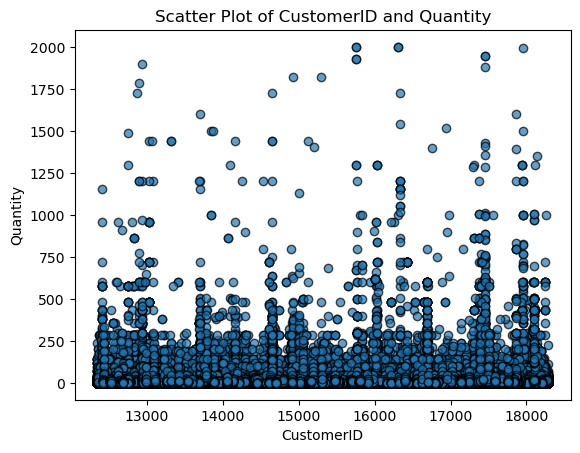

In [21]:
plt.scatter(data['CustomerID'], data['Quantity'], edgecolor='black', alpha=0.7)
plt.xlabel('CustomerID')
plt.ylabel('Quantity')
plt.title('Scatter Plot of CustomerID and Quantity')
plt.show()

## Pivot Tables

In [22]:
pivot_table2 = pd.pivot_table(data, index='Day', columns='Year', values='Quantity', aggfunc ='sum', margins = "True")
pivot_table2.sort_values(by='All', ascending=False, inplace=True)
print(pivot_table2)

Year      2010       2011      All
Day                               
All   355814.0  5050855.0  5406669
7      25324.0   215160.0   240484
5      16243.0   215497.0   231740
6      21775.0   194258.0   216033
20     15767.0   199456.0   215223
17     16947.0   195722.0   212669
11         NaN   211665.0   211665
14     20738.0   187885.0   208623
4          NaN   206013.0   206013
8      23049.0   175415.0   198464
21     15650.0   180715.0   196365
18         NaN   191519.0   191519
28         NaN   185337.0   185337
10     21031.0   161812.0   182843
9      20698.0   161086.0   181784
1      26906.0   152459.0   179365
15     18453.0   157725.0   176178
13     17701.0   153767.0   171468
24         NaN   168129.0   168129
16     27464.0   135904.0   163368
22      3212.0   157995.0   161207
2      28403.0   130329.0   158732
3      16430.0   138540.0   154970
19      3734.0   150583.0   154317
23      5752.0   146864.0   152616
25         NaN   149989.0   149989
12     10537.0   134

In [23]:
pivot_table3 = pd.pivot_table(data, index='Month', columns='Year', values='Quantity', aggfunc = 'sum')
print(pivot_table3)

Year       2010      2011
Month                    
1           NaN  311573.0
2           NaN  274776.0
3           NaN  378863.0
4           NaN  308200.0
5           NaN  391686.0
6           NaN  389633.0
7           NaN  399187.0
8           NaN  421386.0
9           NaN  574169.0
10          NaN  619173.0
11          NaN  748788.0
12     355814.0  233421.0


In [24]:
pivot_table_6 = data.pivot_table(index='CustomerID', columns='Year', values='Quantity', aggfunc='sum', margins=True)
# Sorted pivot table high to low
pivot_table_6.sort_values(by='All', ascending=False, inplace=True)

print(pivot_table_6.head(10))


Year            2010       2011      All
CustomerID                              
All         355814.0  5050855.0  5406669
14646         7983.0   188462.0   196445
14911         3331.0    81894.0    85225
12415            NaN    77812.0    77812
17450          786.0    70251.0    71037
18102         6695.0    61209.0    67904
13694         3860.0    62975.0    66835
17511         6426.0    59565.0    65991
14156         1606.0    59943.0    61549
14298         4976.0    53367.0    58343


## Model Implementation

In [25]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split

In [26]:
X = data[['CustomerID', 'Year', 'Month', 'Day']]
y = data['Quantity']

In [27]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(X)
X = pd.DataFrame(x_scaled, columns=X.columns)

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"rows in train set : {len(X_train)}\nrows in test set : {len(X_test)}\n")

rows in train set : 420822
rows in test set : 105206



In [29]:
# regressor = LinearRegression()
# regressor.fit(X_train, y_train)

# regressor = RandomForestRegressor()
# regressor.fit(X_train, y_train)

regressor = DecisionTreeRegressor()
regressor.fit(X_train, y_train)



DecisionTreeRegressor()

In [30]:
y_pred = regressor.predict(X_test)

In [31]:
print('R-squared score:', regressor.score(X_test, y_test))

R-squared score: 0.3267892862224361


In [32]:
from sklearn.metrics import mean_squared_error

# Calculating the MSE for the training data
y_train_pred = regressor.predict(X_train)
train_mse = mean_squared_error(y_train, y_train_pred)
print('Train MSE:', train_mse)

Train MSE: 489.944470249676


In [33]:
# Calculating the MSE for the test data
y_test_pred = regressor.predict(X_test)
test_mse = mean_squared_error(y_test, y_test_pred)
print('Test MSE:', test_mse)

Test MSE: 767.1758034959994


In [34]:
data = [[17850, 2010, 12, 1]]  # CustomerID, Year, Month and Day

predicted_quantity = regressor.predict(data)

print('Predicted quantity:', predicted_quantity[0])


Predicted quantity: 2.6153846153846154


C:\Users\kajal\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(
